# Students Math Score Prediction using Linear Regression

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# load the dataset and create a copy
df_copy = pd.read_csv('../../dataset/StudentsPerformance.csv')
df = df_copy.copy()

In [3]:
# display the first few rows of the dataframe
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# display the shape of the dataframe
df.shape

(1000, 8)

In [5]:
# display the columns of the dataframe
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
# display the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# display statistical summary of the dataframe
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# count the occurrences of each category
#  in 'test preparation course' column
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [10]:
# apply 1 if 'completed' else 0
df['test preparation course'] = df['test preparation course'].apply(
    lambda x: 0 if x=='none' else 1
)

In [11]:
# sum of missing values in each column
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
# display the columns of the dataframe
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
# define features and target variable
# for modeling
features = ['test preparation course', 'reading score','writing score']
target = ['math score']

In [14]:
# make a new dataframe with
#  selected features and target
df_model = df[features + target].copy()

In [15]:
# display the first few rows of the dataframe
df_model.head()

,test preparation course,reading score,writing score,math score
0,0,72,74,72
1,1,90,88,69
2,0,95,93,90
3,0,57,44,47
4,0,78,75,76


In [16]:
# sum of missing values in each column
df_model.isnull().sum()

test preparation course    0
reading score              0
writing score              0
math score                 0
dtype: int64

In [17]:
# correlation matrix
df_model.corr()

,test preparation course,reading score,writing score,math score
test preparation course,1.000000,0.241780,0.312946,0.177702
reading score,0.241780,1.000000,0.954598,0.817580
writing score,0.312946,0.954598,1.000000,0.802642
math score,0.177702,0.817580,0.802642,1.000000


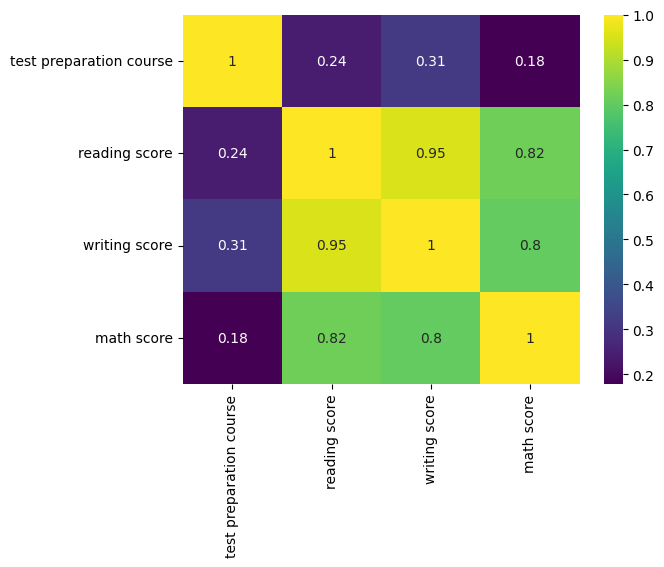

In [18]:
# plot the correlation heatmap
sns.heatmap(df_model.corr(), annot=True, cmap='viridis')
plt.show()

In [19]:
# define X and y for modeling
X = df_model[features]
y = df_model[target]

In [20]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# display the shape of x_train
x_train.shape

(800, 3)

In [22]:
# display the shape of y_train
y_train.shape

(800, 1)

In [23]:
# scale the features using StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [24]:
# create the Linear Regression model
model = LinearRegression()

In [25]:
# fit the model on the training data
model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# make predictions on the test data
y_pred = model.predict(x_test_scaled)

In [27]:
# calculate and print Mean Absolute Error
mae = mean_absolute_error(y_test,y_pred)
print(mae)

7.3195459431043215


In [28]:
# calculate and print Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
print(mse)

76.22050643620932


## 💡 Key Takeaways
- Reading and writing skills are **strong predictors of math performance**.  
- Completing the test preparation course has a **positive impact** on math scores, though smaller than reading/writing influence.  
- The dataset is **clean, balanced**, and suitable for predictive modeling.  
- Linear Regression provides a **simple yet effective baseline model** for predicting student math scores.